In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib

In [3]:
# from google.colab import drive
# drive.mount('/content/gdrive')
# cwd = pathlib.Path("/content/gdrive/MyDrive/telco_customer_churn_prediction/")
# cwd

In [4]:
cwd= pathlib.Path.cwd()

In [5]:
df= pd.read_csv(cwd / "Telco-Customer-Churn.csv")

In [6]:
df.shape

(7032, 21)

In [7]:
df.head().transpose()

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [8]:
df=df.drop(columns=["customerID"])

In [9]:
numerical_colums= df.select_dtypes(exclude="object").columns

In [37]:
categorical_columns= [*df.select_dtypes(include="object").columns]

In [11]:
#Unique values in object types (excluding customerID)
for col in categorical_columns: print(f"{col}: {len(df[col].unique())}")

gender: 2
Partner: 2
Dependents: 2
PhoneService: 2
MultipleLines: 3
InternetService: 3
OnlineSecurity: 3
OnlineBackup: 3
DeviceProtection: 3
TechSupport: 3
StreamingTV: 3
StreamingMovies: 3
Contract: 3
PaperlessBilling: 2
PaymentMethod: 4
Churn: 2


In [12]:
#Unique values in object types (excluding customerID)
for col in categorical_columns: print(f"{col}: {len(df[col].unique())}: {df[col].unique()}")

gender: 2: ['Female' 'Male']
Partner: 2: ['Yes' 'No']
Dependents: 2: ['No' 'Yes']
PhoneService: 2: ['No' 'Yes']
MultipleLines: 3: ['No phone service' 'No' 'Yes']
InternetService: 3: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: 3: ['No' 'Yes' 'No internet service']
OnlineBackup: 3: ['Yes' 'No' 'No internet service']
DeviceProtection: 3: ['No' 'Yes' 'No internet service']
TechSupport: 3: ['No' 'Yes' 'No internet service']
StreamingTV: 3: ['No' 'Yes' 'No internet service']
StreamingMovies: 3: ['No' 'Yes' 'No internet service']
Contract: 3: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: 2: ['Yes' 'No']
PaymentMethod: 4: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: 2: ['No' 'Yes']


In [16]:
# from sklearn.preprocessing import OrdinalEncoder

# encoder = OrdinalEncoder()
# dat = encoder.fit_transform(df)
# dat_df= pd.DataFrame(data=dat,columns=df.columns)

In [41]:
categorical_columns.remove("Churn")

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

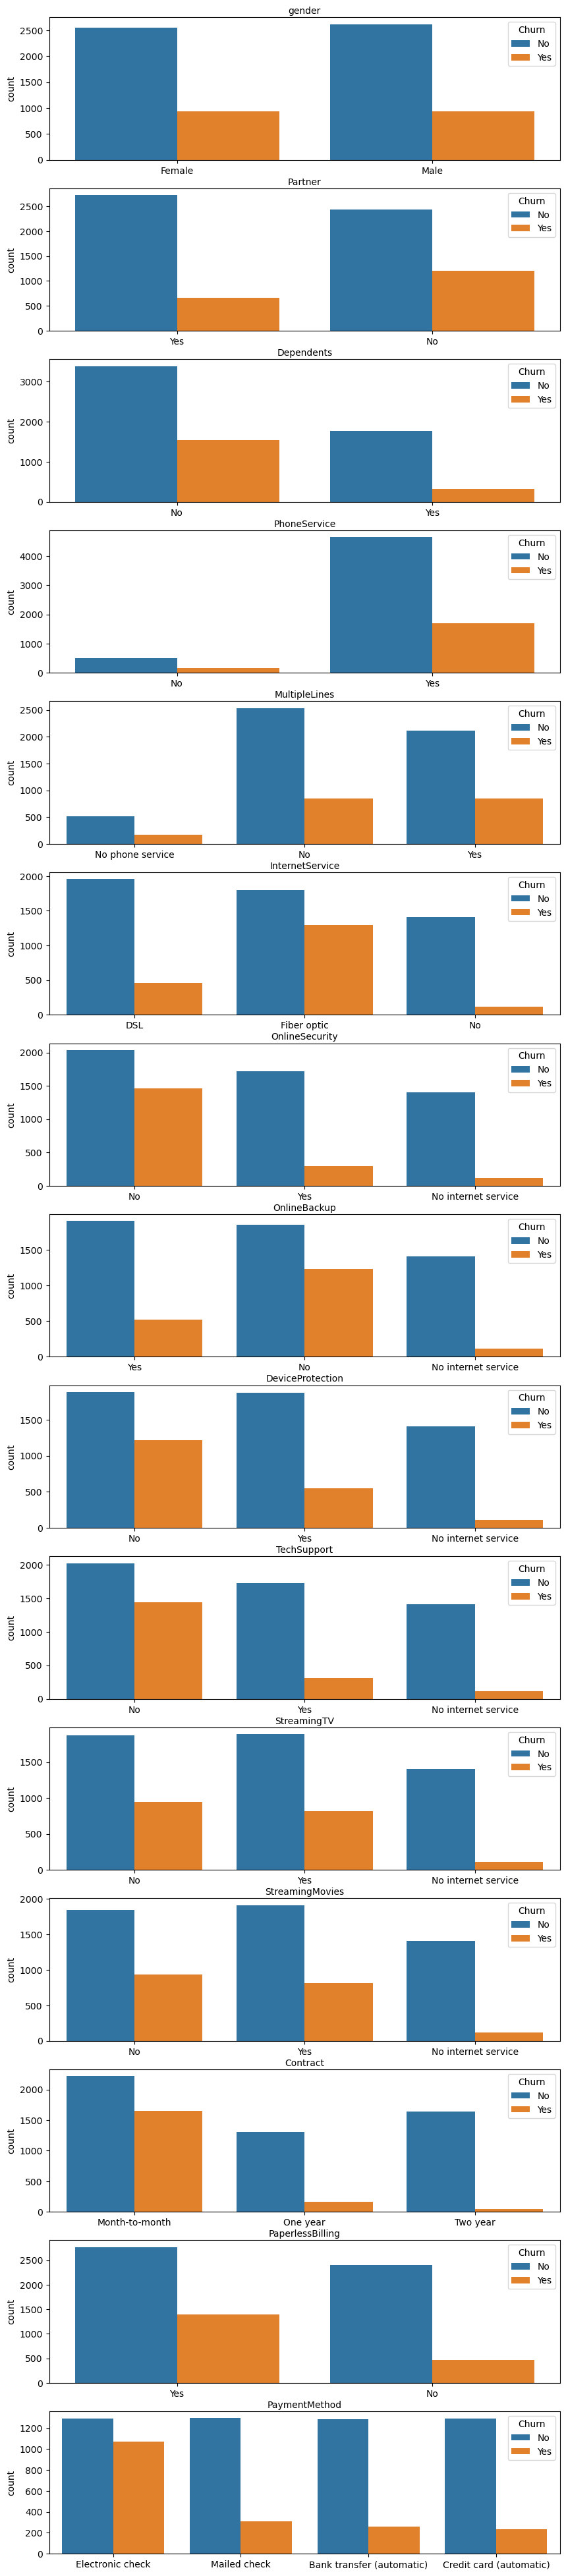

In [58]:
fig, ax =plt.subplots(15,1,figsize=(10, 50))
for idx,cat_col_name in enumerate(categorical_columns): 
    sns.countplot(data=df, x=cat_col_name, hue="Churn", ax=ax[idx])
    ax[idx].xaxis.set_label_position('top') 

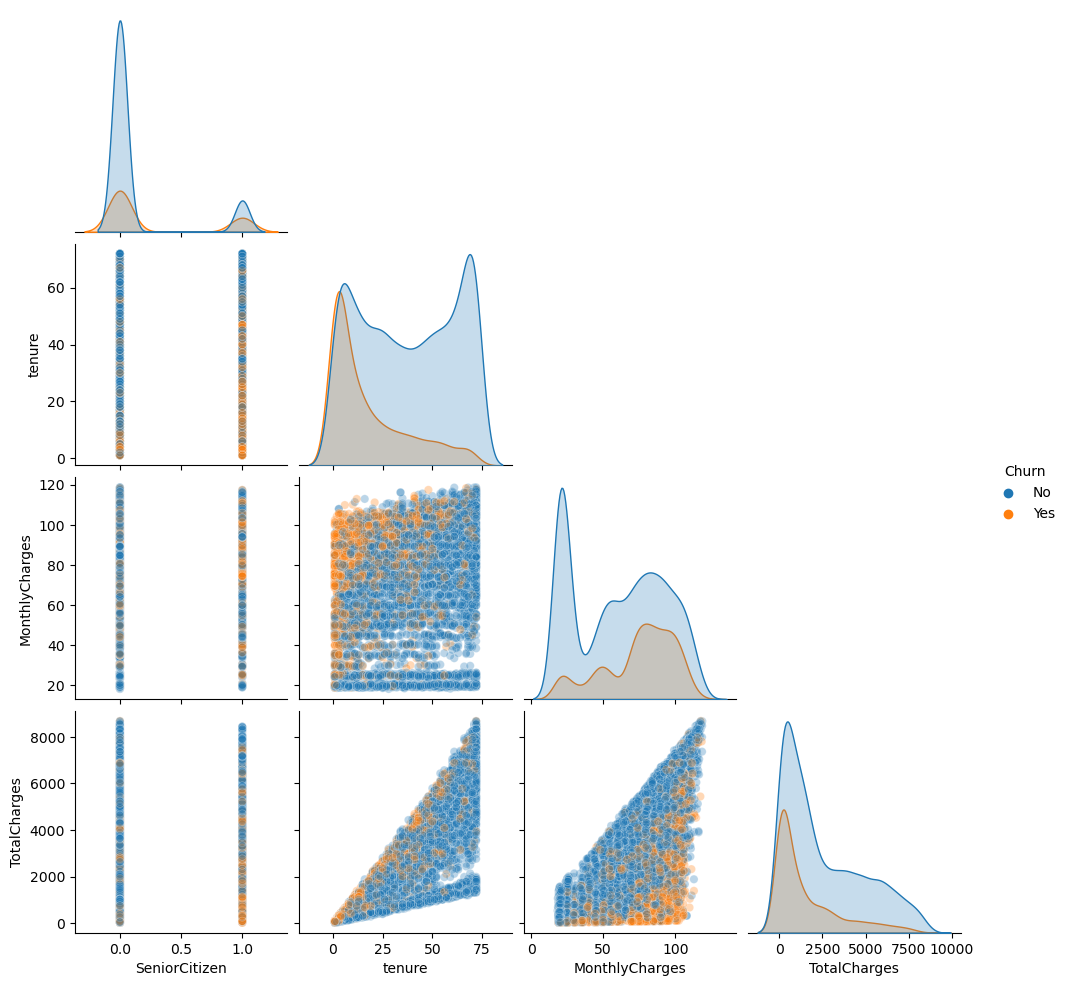

In [54]:
sns.pairplot(df, hue="Churn",corner=True,  kind='scatter', plot_kws={'alpha':0.3})